In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from statistics import NormalDist
from librosa.display import specshow
from IPython.display import Audio

from birdclef import Dataset, SummaryStatistics, FeaturePipeline

### load data

In [2]:
dataset = Dataset.load(Dataset.PATH)
summary = SummaryStatistics(dataset)

### basic summary statistics

In [3]:
summary.num_samples()

16941

In [4]:
label_counts = summary.label_counts()
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

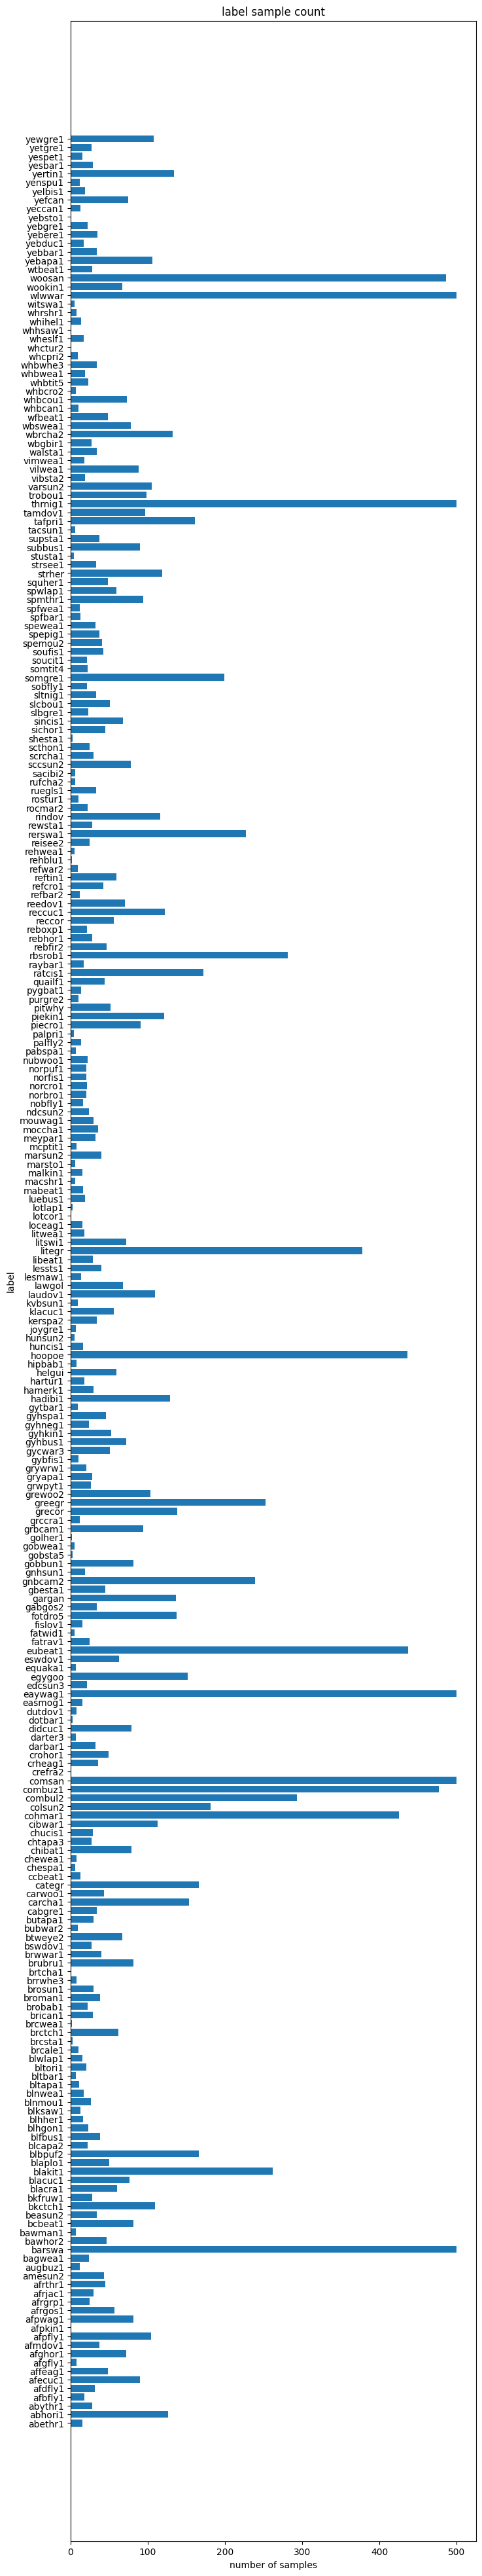

In [5]:
fig, ax = plt.subplots(figsize=(8, 50))
ax.barh(labels, counts)

ax.set_title("label sample count")
ax.set_xlabel("number of samples")
ax.set_ylabel("label")

plt.show()

In [6]:
audio_sample_counts = summary.audio_sample_counts()

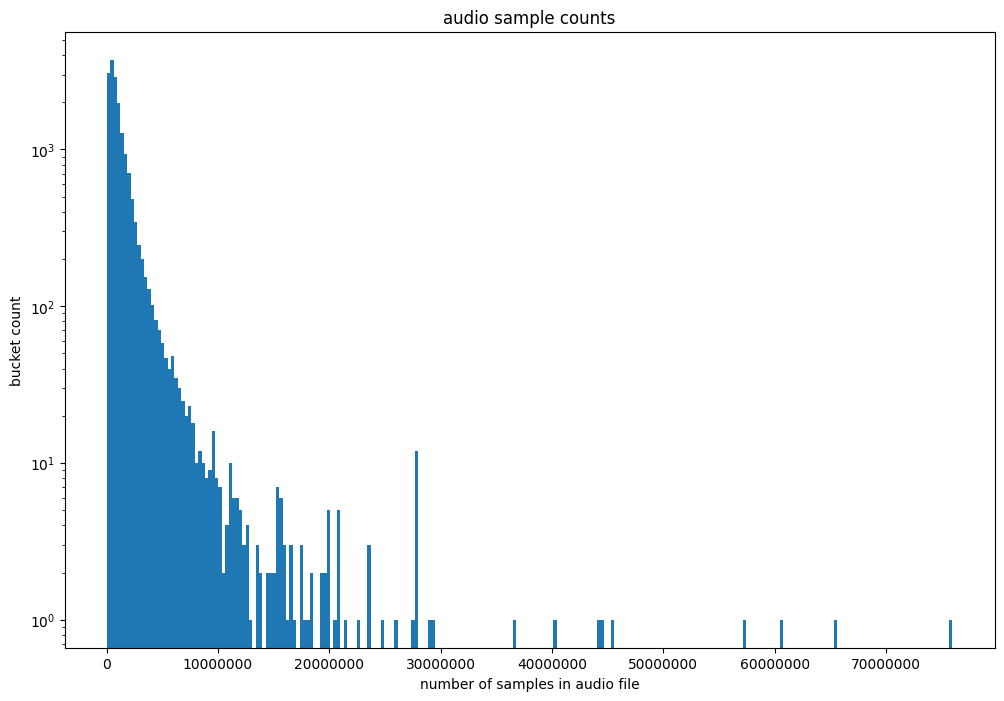

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_sample_counts, bins=250, log=True)

ax.set_title("audio sample counts")
ax.set_xlabel("number of samples in audio file")
ax.set_ylabel("bucket count")
ax.ticklabel_format(style="plain", useOffset=False, axis="x") 

plt.show()

### pick a random sample and analyse its audio

In [117]:
random = dataset.pick_random()
audio_samples = np.array(random.audio_samples(Dataset.SAMPLE_RATE))

In [118]:
random.audio_file_path

'/media/william/Scratch/datasets/birdclef-2023/train_audio/piekin1/XC369952.ogg'

In [119]:
Audio(random.audio_file_path)

In [120]:
len(audio_samples)

292571

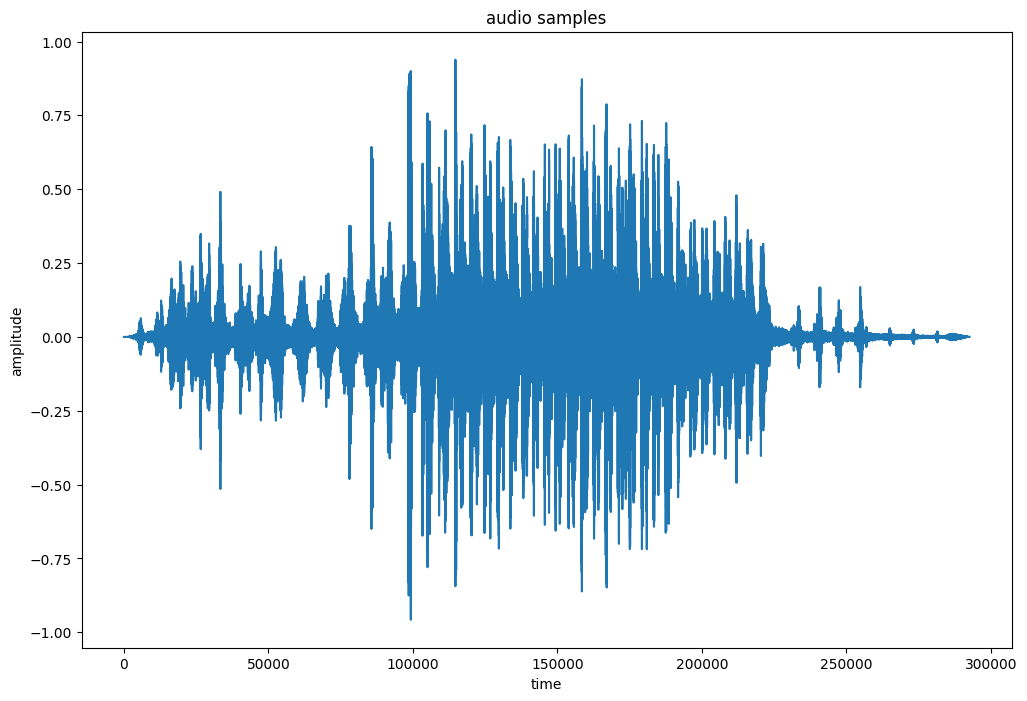

In [121]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(audio_samples)

ax.set_title("audio samples")
ax.set_xlabel("time")
ax.set_ylabel("amplitude")

plt.show()

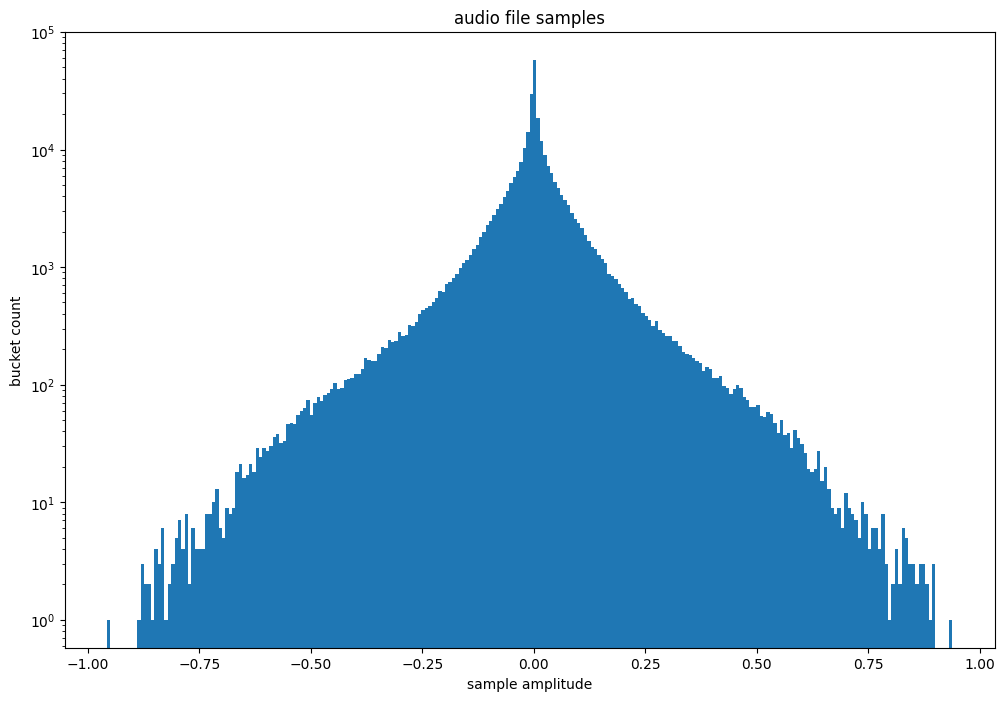

In [122]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_samples, bins=250, log=True)

ax.set_title("audio file samples")
ax.set_xlabel("sample amplitude")
ax.set_ylabel("bucket count")

plt.show()

In [123]:
pipe1 = FeaturePipeline.build_pipeline_1()
pipe2 = FeaturePipeline.build_pipeline_2(n_components=10)
pipe3 = FeaturePipeline.build_pipeline_3(n_components=10)

In [124]:
x1 = pipe1(audio_samples)
x2 = pipe2(audio_samples)
x3 = pipe3(audio_samples)

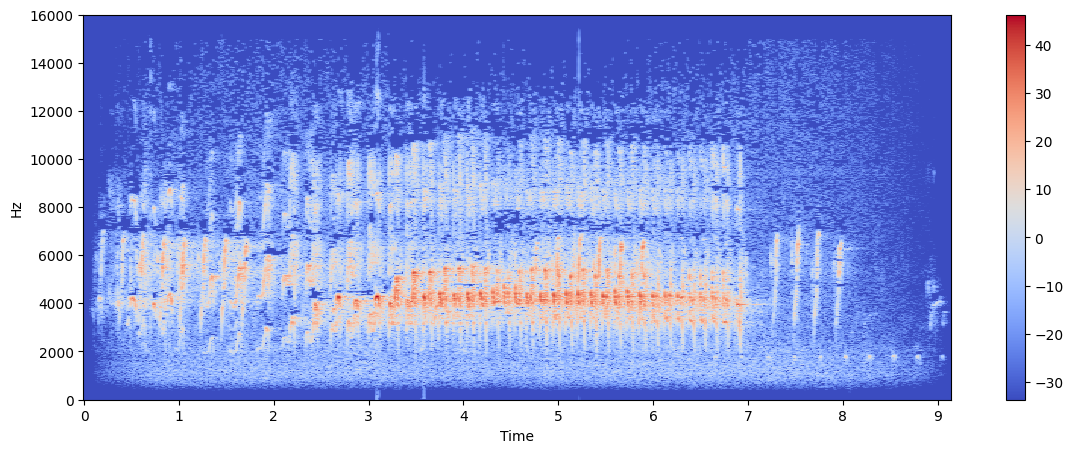

In [125]:
plt.figure(figsize=(14, 5))
specshow(x1, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [126]:
x1.shape

(1025, 572)

In [127]:
f"{(x1.itemsize * x1.size) / 1e6}mb"

'2.3452mb'

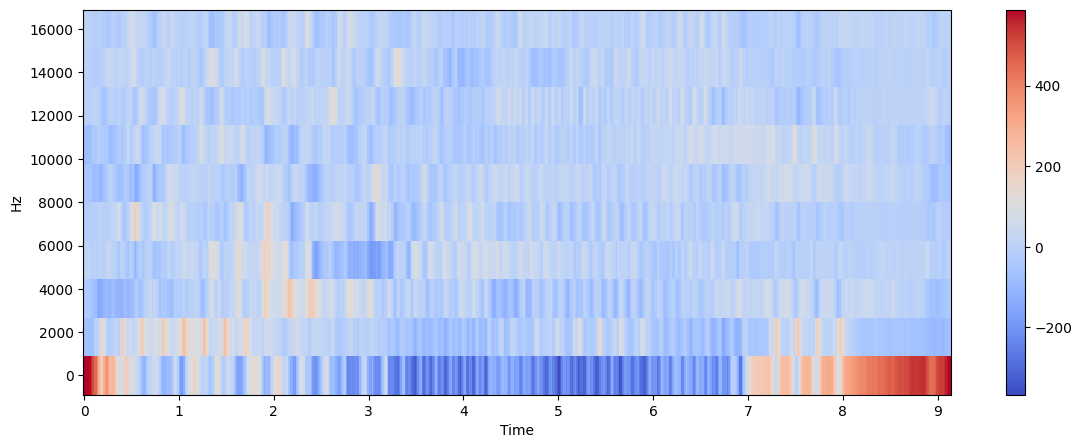

In [128]:
plt.figure(figsize=(14, 5))
specshow(x2, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [129]:
x2.shape

(10, 572)

In [130]:
f"{(x2.itemsize * x2.size) / 1e6}mb"

'0.02288mb'

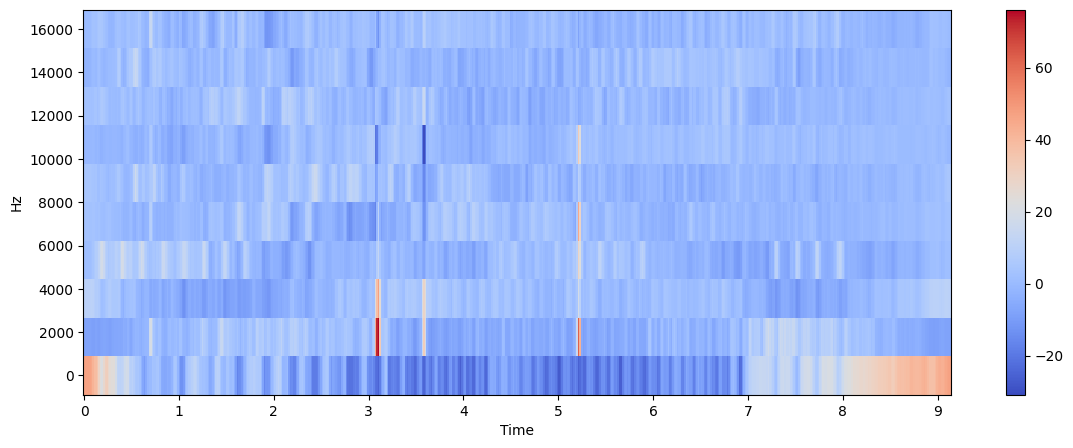

In [131]:
plt.figure(figsize=(14, 5))
specshow(x3, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [132]:
x3.shape

(10, 572)

In [133]:
f"{(x3.itemsize * x3.size) / 1e6}mb"

'0.02288mb'

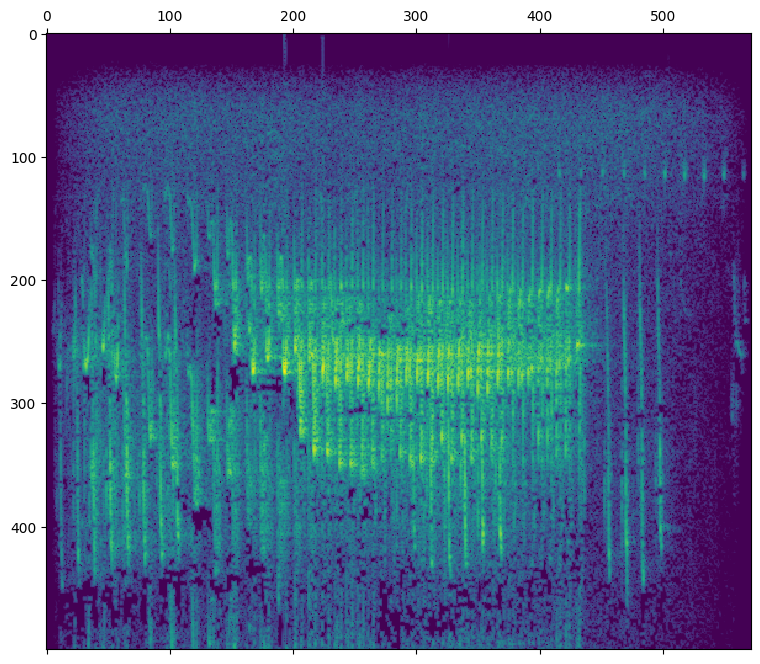

In [148]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.matshow(x1[:500, :600])

In [135]:
flat = np.matrix.flatten(x1)
remove_min = flat[flat > np.min(flat)]

mean = np.mean(remove_min)
std = np.std(remove_min)
threshold = 2.75

d = NormalDist(mu=mean, sigma=std)

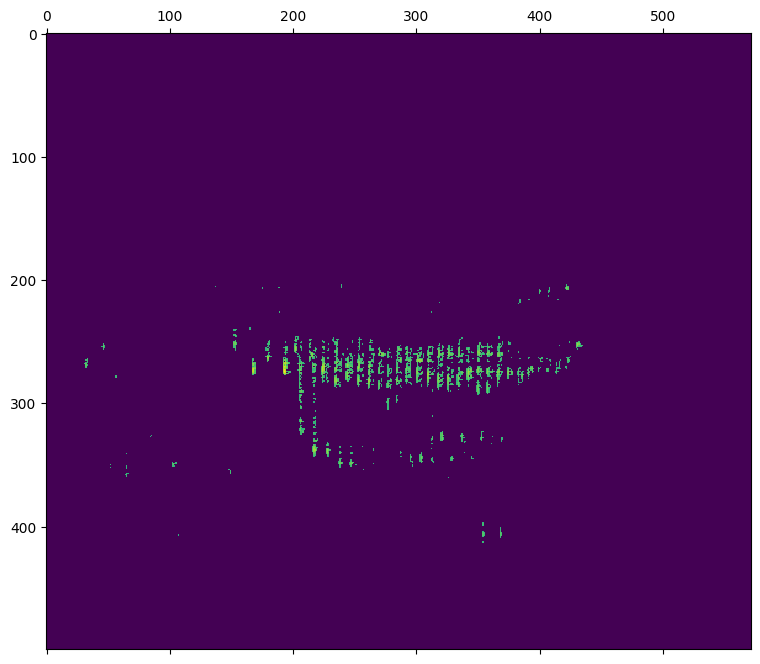

In [136]:
zscore = lambda x: d.zscore(x)
vzscore = np.vectorize(zscore)

zscore_matrix = vzscore(x1)
zscore_matrix_filtered = np.where(zscore_matrix > threshold, zscore_matrix, 0)

fig, ax = plt.subplots(figsize=(16, 8))
ax.matshow(zscore_matrix_filtered[:500, :600])

In [137]:
labeled_matrix, num_features = ndimage.label(zscore_matrix > threshold)

In [138]:
max_values = ndimage.maximum_position(zscore_matrix, labeled_matrix, np.arange(num_features) + 1)

In [139]:
len(max_values)

252

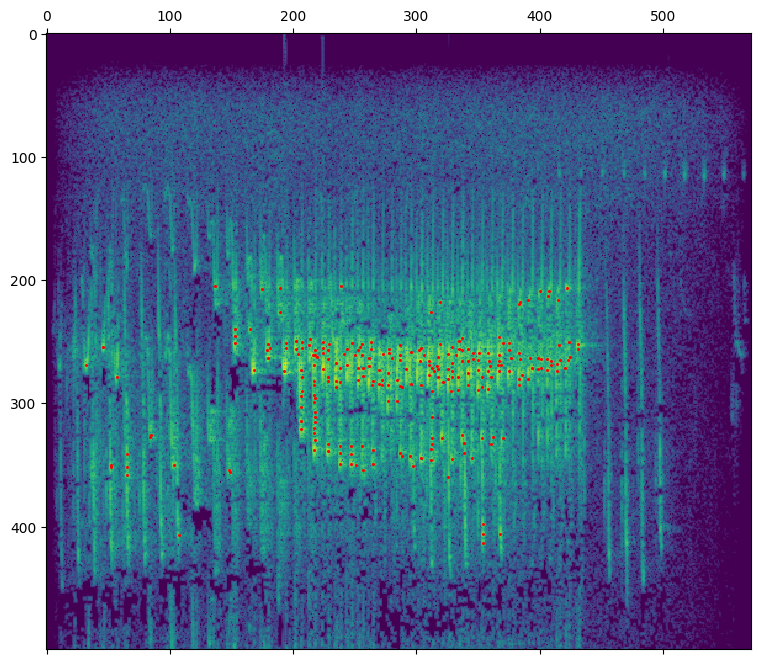

In [140]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter([x[1] for x in max_values], [x[0] for x in max_values], color="red", s=1.5)
ax.matshow(x1[:500, :600])